In [1]:
pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv
import os
import urllib.parse
import pandas as pd
from sqlalchemy import create_engine

In [3]:
load_dotenv("CCA_credentials.env", override=True)

True

In [4]:
username = os.getenv("USERNAME")
password = urllib.parse.quote_plus(os.getenv("PASSWORD"))
host = os.getenv("HOST")
port = os.getenv("PORT")
database = os.getenv("DATABASE")

In [5]:
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

In [6]:
query = "SELECT * FROM SUBSCRIBERS"

In [7]:
df = pd.read_sql(query, con=engine)

In [8]:
df.head()

,Account Age,Monthly Charges,Total Charges,Subscription Type,Payment Method,Paperless Billing,ContentType,MultiDevice Access,Device Registered,Viewing Hours Per Week,...,Content Downloads Per Month,Genre Preference,User Rating,Support Tickets Per Month,Gender,Watchlist Size,Parental Control,Subtitles Enabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [9]:
df.describe()

,Account Age,Monthly Charges,Total Charges,Viewing Hours Per Week,Average Viewing Duration,Content Downloads Per Month,User Rating,Support Tickets Per Month,Watchlist Size,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [10]:
df.isnull().sum()

Account Age                    0
Monthly Charges                0
Total Charges                  0
Subscription Type              0
Payment Method                 0
Paperless Billing              0
ContentType                    0
MultiDevice Access             0
Device Registered              0
Viewing Hours Per Week         0
Average Viewing Duration       0
Content Downloads Per Month    0
Genre Preference               0
User Rating                    0
Support Tickets Per Month      0
Gender                         0
Watchlist Size                 0
Parental Control               0
Subtitles Enabled              0
CustomerID                     0
Churn                          0
dtype: int64

In [11]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
243782    False
243783    False
243784    False
243785    False
243786    False
Length: 243787, dtype: bool

In [12]:
df.shape

(243787, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Account Age                  243787 non-null  int64  
 1   Monthly Charges              243787 non-null  float64
 2   Total Charges                243787 non-null  float64
 3   Subscription Type            243787 non-null  object 
 4   Payment Method               243787 non-null  object 
 5   Paperless Billing            243787 non-null  object 
 6   ContentType                  243787 non-null  object 
 7   MultiDevice Access           243787 non-null  object 
 8   Device Registered            243787 non-null  object 
 9   Viewing Hours Per Week       243787 non-null  float64
 10  Average Viewing Duration     243787 non-null  float64
 11  Content Downloads Per Month  243787 non-null  int64  
 12  Genre Preference             243787 non-null  object 
 13 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df.head(5)

,Account Age,Monthly Charges,Total Charges,Subscription Type,Payment Method,Paperless Billing,ContentType,MultiDevice Access,Device Registered,Viewing Hours Per Week,...,Content Downloads Per Month,Genre Preference,User Rating,Support Tickets Per Month,Gender,Watchlist Size,Parental Control,Subtitles Enabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [16]:
# Examine the distribution of unique categories in categorial columns

categorial_cols = df[["Subscription Type", "Payment Method", "Paperless Billing", "ContentType", "Device Registered", "Genre Preference", "Gender", "Parental Control", "Churn", "Subtitles Enabled" ]].columns
for col in categorial_cols:
    print(f"Value Count for {col} = ")
    display(df[col].value_counts())

Value Count for Subscription Type = 


Subscription Type
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64

Value Count for Payment Method = 


Payment Method
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64

Value Count for Paperless Billing = 


Paperless Billing
No     121980
Yes    121807
Name: count, dtype: int64

Value Count for ContentType = 


ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64

Value Count for Device Registered = 


Device Registered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64

Value Count for Genre Preference = 


Genre Preference
Comedy     49060
Fantasy    48955
Drama      48744
Action     48690
Sci-Fi     48338
Name: count, dtype: int64

Value Count for Gender = 


Gender
Female    121930
Male      121857
Name: count, dtype: int64

Value Count for Parental Control = 


Parental Control
Yes    122085
No     121702
Name: count, dtype: int64

Value Count for Churn = 


Churn
0    199605
1     44182
Name: count, dtype: int64

Value Count for Subtitles Enabled = 


Subtitles Enabled
Yes    122180
No     121607
Name: count, dtype: int64

In [ ]:
df["Churn"].value_counts().plot(kind="bar", color=['skyblue', 'salmon'], title="Churn Distribution") 

In [ ]:
df.groupby('Gender')['Churn'].mean().plot(kind='bar', title="Churn Rate by Gender")

In [17]:
df['Total Charges'].describe()

count    243787.000000
mean        750.741017
std         523.073273
min           4.991154
25%         329.147027
50%         649.878487
75%        1089.317362
max        2378.723844
Name: Total Charges, dtype: float64

In [18]:
bins = [0, 329, 649, 1089, 2378]
labels = ['Low', 'Medium', 'High', 'Very High']

df['Total Charges Band'] = pd.cut(df['Total Charges'], bins=bins, labels=labels, right=False)

C:\Users\caree\AppData\Local\Temp\ipykernel_10292\383832135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = (df.groupby('Total Charges Band')['Churn'].mean())*100


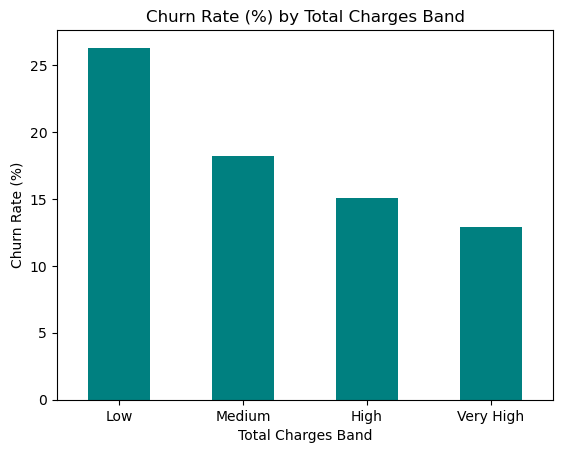

In [21]:
churn_rate = (df.groupby('Total Charges Band')['Churn'].mean())*100
churn_rate.plot(kind='bar', color='teal', title='Churn Rate (%) by Total Charges Band')
plt.xlabel('Total Charges Band')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

## Insight:

# Customers in the ‘Low’ total charges band churn at over 26%, significantly higher than those in higher bands. This indicates that low spenders may not be finding enough value early on and are at greater risk of dropping off. Targeted onboarding and early engagement could help reduce churn in this group.

<Axes: title={'center': 'Churn Rate by Subscription Type'}, xlabel='Subscription Type'>

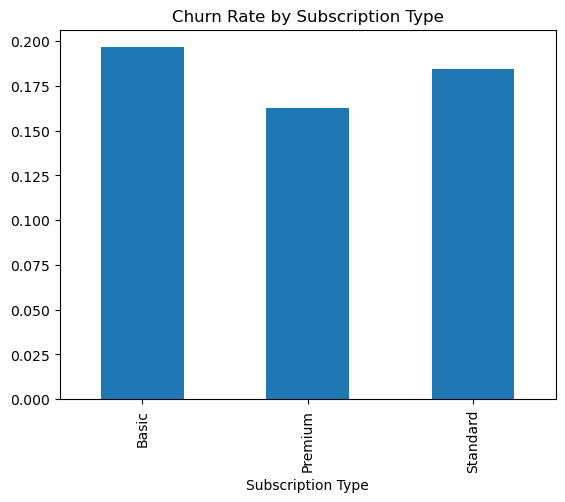

In [22]:
df.groupby('Subscription Type')['Churn'].mean().plot(kind='bar', title="Churn Rate by Subscription Type")

<Axes: title={'center': 'Churn Rate by Support Tickets Per Month'}, xlabel='Support Tickets Per Month'>

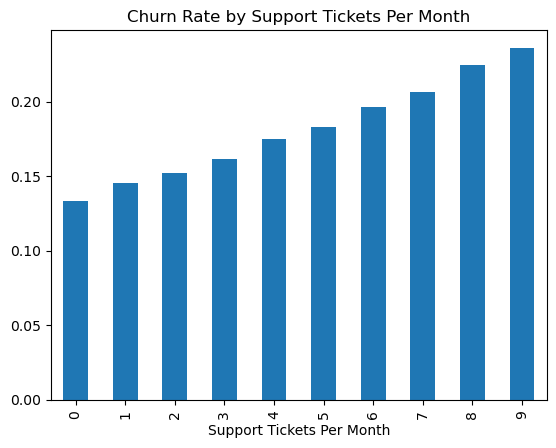

In [23]:
df.groupby("Support Tickets Per Month")['Churn'].mean().plot(kind='bar', title="Churn Rate by Support Tickets Per Month")

### As the number of support tickets increases, the churn rate also increases.

### Insight: Customers who raise more support tickets are more likely to churn.


In [24]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '10-20', '20-30', '30-40']
df['Viewing Hours Binned'] = pd.cut(df['Viewing Hours Per Week'], bins=bins, labels=labels, right=False)


C:\Users\caree\AppData\Local\Temp\ipykernel_10292\699748958.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Viewing Hours Binned')['Churn'].mean().plot(kind='bar', title='Churn Rate By Viewing Hours Per Week')


<Axes: title={'center': 'Churn Rate By Viewing Hours Per Week'}, xlabel='Viewing Hours Binned'>

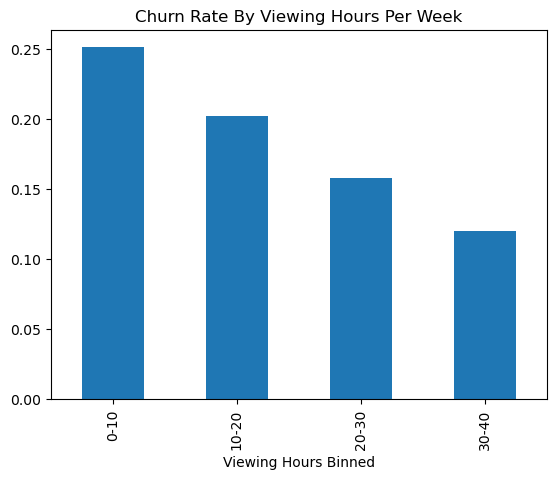

In [25]:
df.groupby('Viewing Hours Binned')['Churn'].mean().plot(kind='bar', title='Churn Rate By Viewing Hours Per Week')

In [26]:
df['Viewing Hours Per Week'].describe()

count    243787.000000
mean         20.502179
std          11.243753
min           1.000065
25%          10.763953
50%          20.523116
75%          30.219396
max          39.999723
Name: Viewing Hours Per Week, dtype: float64

In [27]:
df['Viewing Hours Binned'].value_counts()

Viewing Hours Binned
20-30    62780
10-20    62575
30-40    62339
0-10     56093
Name: count, dtype: int64

In [28]:
# Analysis of Customer Churn by Account Age

df.groupby('Churn')['Account Age'].mean()

Churn
0    63.273290
1    45.674121
Name: Account Age, dtype: float64

In [29]:
df['Account Age'].describe()

count    243787.000000
mean         60.083758
std          34.285143
min           1.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: Account Age, dtype: float64

In [30]:
bins = [0, 6, 12, 24, 36, 60, 84, 120]
labels = ['0-6M', '6-12M', '1-2Y', '2-3Y', '3-5Y', '5-7Y', '7-10Y']

df['Users Account Age'] = pd.cut(df['Account Age'], bins=bins, labels=labels, right=False)

C:\Users\caree\AppData\Local\Temp\ipykernel_10292\174921803.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Users Account Age')['Churn'].mean().plot(kind='bar', title='Churn Rate By Users Account Age')


<Axes: title={'center': 'Churn Rate By Users Account Age'}, xlabel='Users Account Age'>

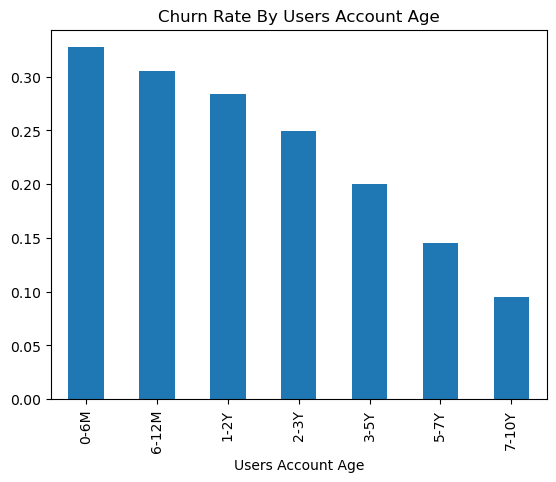

In [31]:
df.groupby('Users Account Age')['Churn'].mean().plot(kind='bar', title='Churn Rate By Users Account Age') 

# Highest Churn for Newest Accounts (0-6 Months): The churn rate is highest for the newest accounts, specifically those aged 0-6 months, with a churn rate of approximately 0.33 or 33%.

# Lowest Churn for Oldest Accounts (7-10 Years): The churn rate is lowest for the oldest accounts, those aged 7-10 years, at approximately 0.10 or 10%.


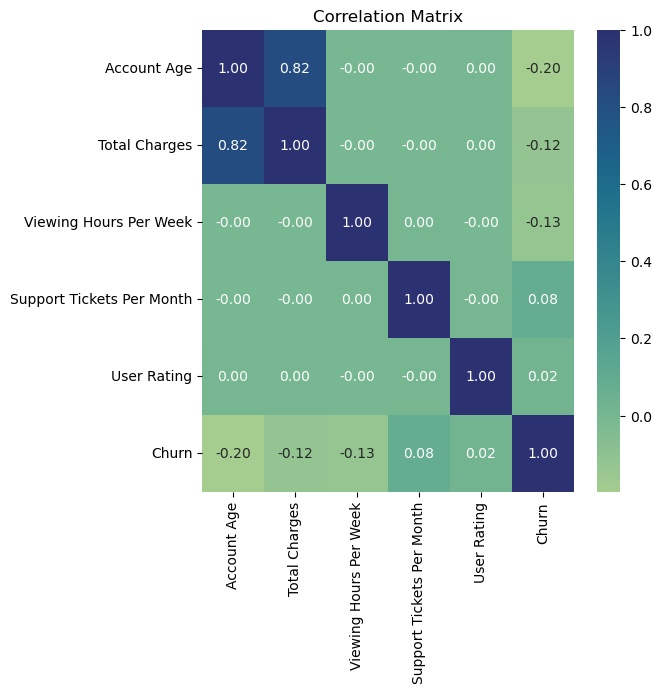

In [33]:
# Correlation Analysis 

numerical_cols = df[['Account Age', 'Total Charges', 'Viewing Hours Per Week', 'Support Tickets Per Month', 'User Rating', 'Churn']].columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


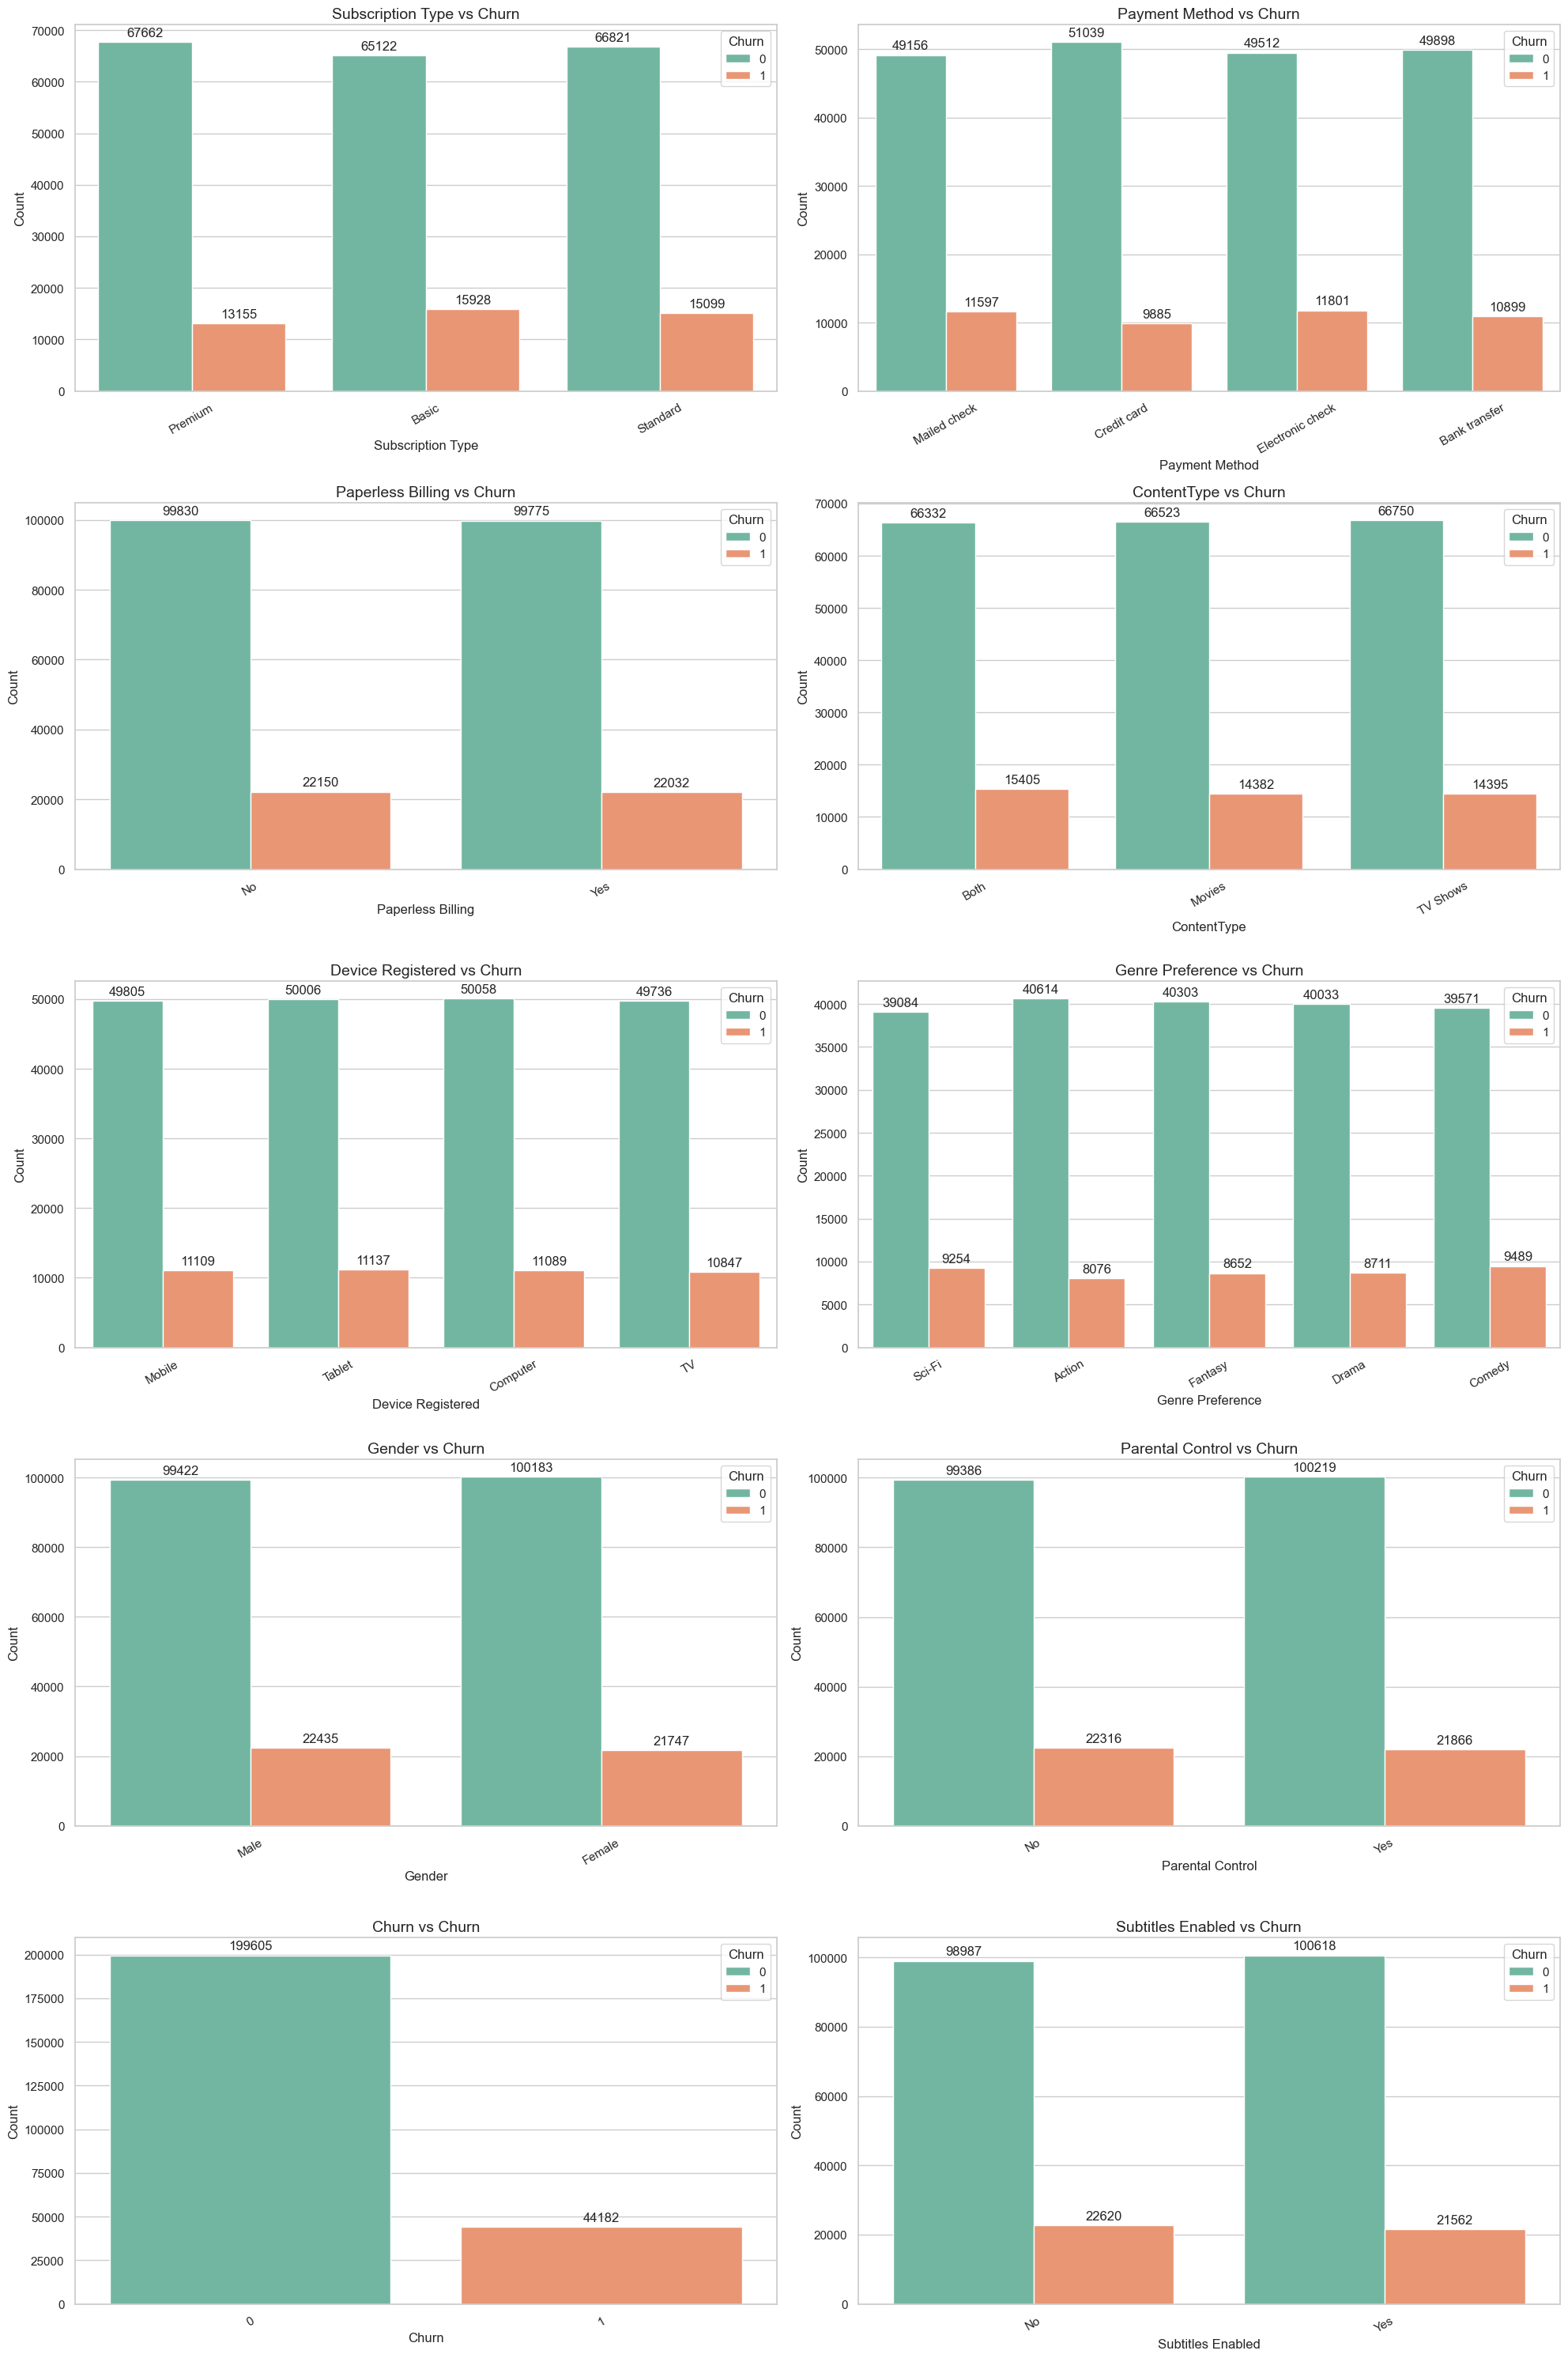

In [43]:
# Categorial Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Define your categorical columns
categorical_cols = df[["Subscription Type", "Payment Method", "Paperless Billing", "ContentType",
                       "Device Registered", "Genre Preference", "Gender", "Parental Control", 
                       "Churn", "Subtitles Enabled"]].columns

# Create subplots
plt.figure(figsize=(20, 30))  # Adjust height if needed
 
for i, col in enumerate(categorical_cols):
    ax = plt.subplot(5, 2, i + 1)
    plot = sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=ax)
    
    # ✅ Simple label on top of each bar
    for container in plot.containers:
        plot.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=12)

    ax.set_title(f'{col} vs Churn', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=30)
    ax.legend(title='Churn')

plt.tight_layout()
plt.show()